In [2]:
!python --version
!pip --version

Python 3.6.13 :: Anaconda, Inc.


pip 21.3.1 from d:\Programs\anaconda3\envs\crowd36\lib\site-packages\pip (python 3.6)



In [3]:
!pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [4]:
ls

 Volume in drive D is DATA
 Volume Serial Number is 1646-E442

 Directory of d:\models\9.CrowdDetection-DroneVision

01/25/2024  09:17 AM    <DIR>          .
01/22/2024  09:48 AM    <DIR>          ..
01/25/2024  09:15 AM    <DIR>          .ipynb_checkpoints
01/25/2024  09:16 AM    <DIR>          .virtual_documents
01/25/2024  10:15 AM         3,030,660 CrowdDetection2.ipynb
01/19/2024  03:47 PM         2,976,333 CrowdDetection3.ipynb
01/25/2024  11:02 AM    <DIR>          CSRNet-Keras
01/16/2024  02:19 PM       174,398,901 ShanghaiTech_Crowd_Counting_Dataset.zip
11/08/2023  01:01 PM         2,285,239 SIYI AI Tracking Module User Manual v1.0.pdf
01/24/2024  06:25 PM             2,894 Untitled.ipynb
01/25/2024  09:09 AM                 0 untitled.py
01/24/2024  06:25 PM                72 Untitled1.ipynb
01/25/2024  09:17 AM             1,070 Untitled2.ipynb
11/17/2023  01:03 PM           566,244 군중혼잡도 기술 제안서.hwp
11/03/2023  03:40 PM         2,622,650 다중객체인식 군중혼잡도 탐지.pptx
11/08/2023  04:4

In [5]:
cd CSRNet-Keras

d:\models\9.CrowdDetection-DroneVision\CSRNet-Keras


In [6]:
ls

 Volume in drive D is DATA
 Volume Serial Number is 1646-E442

 Directory of d:\models\9.CrowdDetection-DroneVision\CSRNet-Keras

01/25/2024  11:02 AM    <DIR>          .
01/25/2024  09:17 AM    <DIR>          ..
01/16/2024  05:01 PM             1,307 .gitignore
01/24/2024  06:05 PM    <DIR>          .ipynb_checkpoints
01/25/2024  10:39 AM    <DIR>          __pycache__
01/16/2024  05:01 PM             2,998 CSRNet.py
01/24/2024  04:13 PM    <DIR>          data
01/16/2024  05:01 PM           632,339 generate_datasets.ipynb
01/16/2024  05:01 PM         1,781,675 main.ipynb
01/16/2024  05:01 PM    <DIR>          materials
01/16/2024  05:01 PM    <DIR>          models
01/16/2024  05:01 PM             1,783 README.md
01/17/2024  02:21 PM             2,427 utils_callback.py
01/17/2024  01:37 PM             3,920 utils_gen.py
01/16/2024  05:01 PM             2,778 utils_imgproc.py
01/16/2024  05:01 PM               239 utils_loss.py
01/25/2024  11:02 AM    <DIR>          weights_A
01/16/2024 

In [6]:
!pip install h5py==2.9.0
!pip install opencv
!pip install keras==2.3.1
!pip install tensorflow==2.0.0
!pip install scipy==1.2.1
!pip install tqdm==4.36.1
!pip install matplotlib==3.0.3
!pip install numpy==1.16.4

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


ERROR: Could not find a version that satisfies the requirement opencv (from versions: none)
ERROR: No matching distribution found for opencv


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5


In [7]:
conda install -c conda-forge opencv

Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: d:\Programs\anaconda3\envs\crowd36

  added / updated specs:
    - opencv


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1w             |       hcfcfb64_0         5.0 MB  conda-forge
    vc14_runtime-14.38.33130   |      h82b7239_18         732 KB  conda-forge
    vs2015_runtime-14.38.33130 |      hcb4865c_18          17 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         5.7 MB

The following NEW packages will be INSTALLED:

  ucrt               conda-forge/win-64::ucrt-10.0.22621.0-h57928b3_0 
  vc14_runtime       conda-forge/win-64::vc14_runtime-14.38.33130-h82b7239_18 

The following packages will be UPDATED:

  openssl                            

In [7]:
import h5py
print(h5py.__version__)
import cv2
print(cv2.__version__)
import keras
print(keras.__version__)
import tensorflow
print(tensorflow.__version__)
import scipy
print(scipy.__version__)
import tqdm
print(tqdm.__version__)
import matplotlib
print(matplotlib.__version__)
import numpy
print(numpy.__version__)

2.9.0
4.5.3
2.3.1
2.0.0
1.2.1
4.36.1
3.0.3
1.16.4


In [8]:
import os
import cv2
import glob
import h5py
from scipy.io import loadmat
import numpy as np
from tqdm import tqdm
from utils_gen import gen_density_map_gaussian
import matplotlib.pyplot as plt
%matplotlib inline


root = 'data/ShanghaiTech/'
part_A_train = os.path.join(root, 'part_A/train_data', 'images')
part_A_test = os.path.join(root, 'part_A/test_data', 'images')
part_B_train = os.path.join(root, 'part_B/train_data', 'images')
part_B_test = os.path.join(root, 'part_B/test_data', 'images')
path_sets_A = [part_A_train, part_A_test]
path_sets_B = [part_B_train, part_B_test]
img_paths_A = []
for path in path_sets_A:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths_A.append(img_path)
print(len(img_paths_A))
img_paths_B = []
for path in path_sets_B:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths_B.append(img_path)
print(len(img_paths_B))

482
716


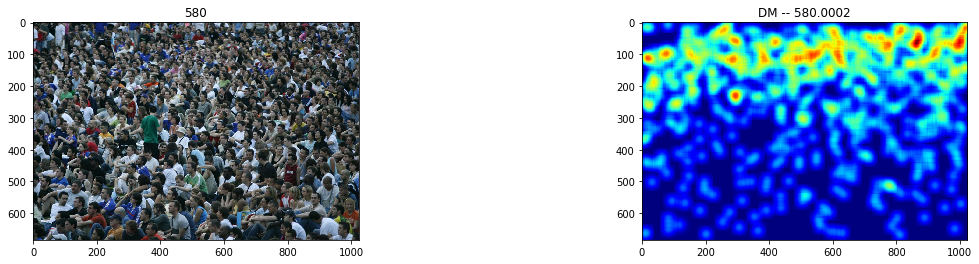

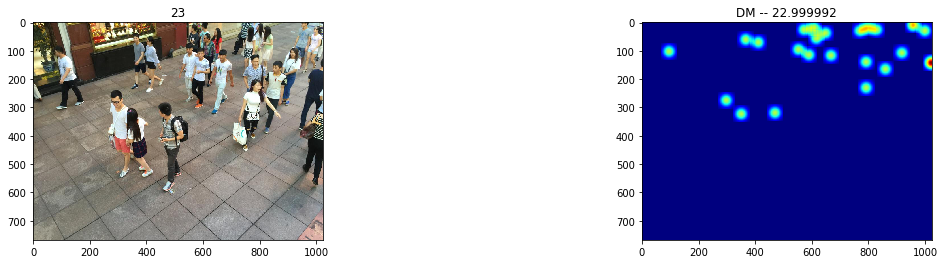

In [9]:
# Show a sample
img_paths = ['data/ShanghaiTech/part_A/train_data/images/IMG_196.jpg',
             'data/ShanghaiTech/part_B/test_data/images/IMG_1.jpg']
for img_path in img_paths:
    img_ori = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    pts = loadmat(img_path.replace('.jpg', '.mat').replace('images', 'ground-truth').replace('IMG_', 'GT_IMG_'))
    img = cv2.imread(img_path)
    
    sigma = 4  if 'part_A' in img_path else 15
    k = np.zeros((img.shape[0], img.shape[1]))
    gt = pts["image_info"][0, 0][0, 0][0]
    for i in range(len(gt)):
        if int(gt[i][1]) < img.shape[0] and int(gt[i][0]) < img.shape[1]:
            k[int(gt[i][1]), int(gt[i][0])] = 1

    DM = gen_density_map_gaussian(k, gt, sigma=sigma)
    fg, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 4))
    ax0.imshow(img_ori)
    ax0.set_title(str(gt.shape[0]))
    ax1.imshow(np.squeeze(DM), cmap=plt.cm.jet)
    ax1.set_title('DM -- '+str(np.sum(DM)))
    plt.show()

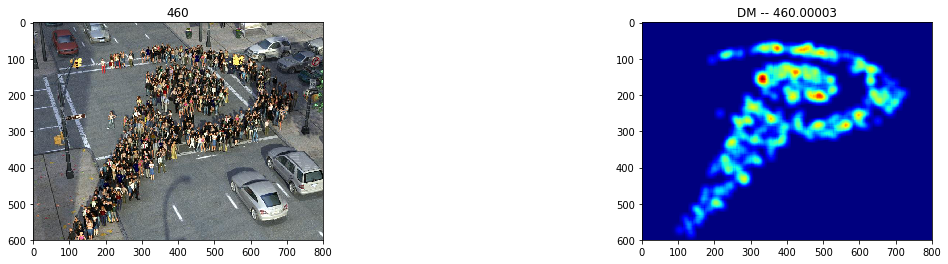

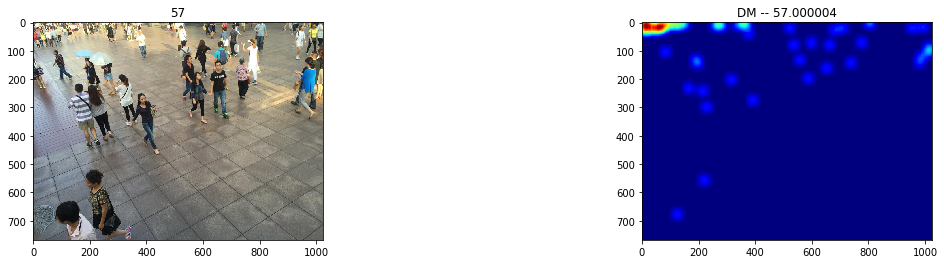

In [10]:
# Show a sample
img_paths = ['data/ShanghaiTech/part_A/train_data/images/IMG_197.jpg',
             'data/ShanghaiTech/part_B/test_data/images/IMG_15.jpg']
for img_path in img_paths:
    img_ori = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    pts = loadmat(img_path.replace('.jpg', '.mat').replace('images', 'ground-truth').replace('IMG_', 'GT_IMG_'))
    img = cv2.imread(img_path)
    
    sigma = 4  if 'part_A' in img_path else 15
    k = np.zeros((img.shape[0], img.shape[1]))
    gt = pts["image_info"][0, 0][0, 0][0]
    for i in range(len(gt)):
        if int(gt[i][1]) < img.shape[0] and int(gt[i][0]) < img.shape[1]:
            k[int(gt[i][1]), int(gt[i][0])] = 1

    DM = gen_density_map_gaussian(k, gt, sigma=sigma)
    fg, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 4))
    ax0.imshow(img_ori)
    ax0.set_title(str(gt.shape[0]))
    ax1.imshow(np.squeeze(DM), cmap=plt.cm.jet)
    ax1.set_title('DM -- '+str(np.sum(DM)))
    plt.show()

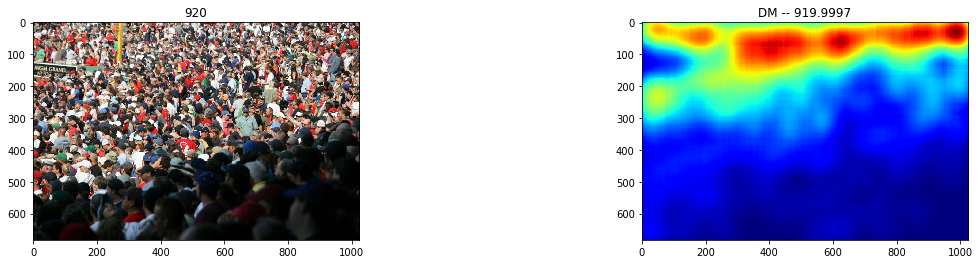

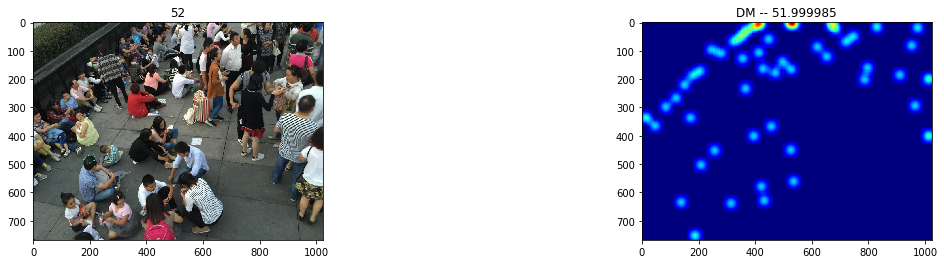

In [11]:
# Show a sample
img_paths = ['data/ShanghaiTech/part_A/train_data/images/IMG_10.jpg',
             'data/ShanghaiTech/part_B/test_data/images/IMG_2.jpg']
for img_path in img_paths:
    img_ori = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    pts = loadmat(img_path.replace('.jpg', '.mat').replace('images', 'ground-truth').replace('IMG_', 'GT_IMG_'))
    img = cv2.imread(img_path)
    
    sigma = 4  if 'part_A' in img_path else 15
    k = np.zeros((img.shape[0], img.shape[1]))
    gt = pts["image_info"][0, 0][0, 0][0]
    for i in range(len(gt)):
        if int(gt[i][1]) < img.shape[0] and int(gt[i][0]) < img.shape[1]:
            k[int(gt[i][1]), int(gt[i][0])] = 1

    DM = gen_density_map_gaussian(k, gt, sigma=sigma)
    fg, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 4))
    ax0.imshow(img_ori)
    ax0.set_title(str(gt.shape[0]))
    ax1.imshow(np.squeeze(DM), cmap=plt.cm.jet)
    ax1.set_title('DM -- '+str(np.sum(DM)))
    plt.show()

In [12]:
import os
import cv2
import time
import random
import shutil
import numpy as np
import matplotlib.pyplot as plt
from keras.models import model_from_json
from utils_gen import gen_paths_img_dm, gen_var_from_paths
from utils_imgproc import norm_by_imagenet
%matplotlib inline
plt.ioff()


# Settings
net = 'CSRNet'
dataset = "A"
# Generate paths of (train, test) x (img, dm)
(test_img_paths, train_img_paths), (test_dm_paths, train_dm_paths) = gen_paths_img_dm(
    path_file_root='data/paths_train_val_test',
    dataset=dataset
)
# Generate raw images(normalized by imagenet rgb) and density maps
test_x, test_y = gen_var_from_paths(test_img_paths[:], unit_len=None), gen_var_from_paths(test_dm_paths[:], stride=8, unit_len=None)
test_x = norm_by_imagenet(test_x)  # Normalization on raw images in test set, those of training set are in image_preprocessing below.
print('Test data size:', test_x.shape[0], test_y.shape[0], len(test_img_paths))
train_x, train_y = gen_var_from_paths(train_img_paths[:], unit_len=None), gen_var_from_paths(train_dm_paths[:], stride=8, unit_len=None)
print('Train data size:', train_x.shape[0], train_y.shape[0], len(train_img_paths))
# Delete the directory for saving weights during last training.
weights_dir = 'weights_' + dataset
if os.path.exists(weights_dir):
    shutil.rmtree(weights_dir)

Test data size: 182 182 182
Train data size: 300 300 300


In [13]:
import numpy as np

# This will work
a = [[1, 2, 3], [4, 5, 6]]
np.array(a)

# This will throw the ValueError you're seeing
b = [[1, 2, 3], [4, 5]]
np.array(b)

array([list([1, 2, 3]), list([4, 5])], dtype=object)

In [14]:
!pip install pydot

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [15]:
from keras.optimizers import Adam
from keras.utils import plot_model
from CSRNet import CSRNet

# Create empty directory for saving weights during training
if os.path.exists(weights_dir):
    shutil.rmtree(weights_dir)
os.makedirs(weights_dir)

# Settings of network
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
LOSS = 'MSE'
optimizer = Adam(lr=1e-5)

# Create my model
model = CSRNet(input_shape=(None, None, 3))
model.compile(optimizer=optimizer, loss='MSE')
model.summary()
if not os.path.exists('models'):
    os.makedirs('models')
plot_model(model, 'models/{}.png'.format(net))
with open('./models/{}.json'.format(net), 'w') as fout:
    fout.write(model.to_json())
    

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 64)    1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 64)    36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, None, None, 64)    0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, None, None, 128)   73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, None, None, 128)   147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, None, None, 128)   0   

OSError: `pydot` failed to call GraphViz.Please install GraphViz (https://www.graphviz.org/) and ensure that its executables are in the $PATH.

In [16]:
!pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [3]:
!sudo apt install python-pydot python-pydot-ng graphviz

'sudo' is not recognized as an internal or external command,
operable program or batch file.


In [17]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [19]:
!pip install scikit-image

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Attempting uninstall: decorator
    Found existing installation: decorator 5.1.1
    Uninstalling decorator-5.1.1:
      Successfully uninstalled decorator-5.1.1


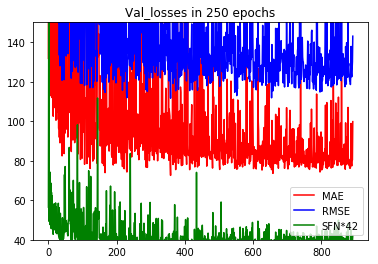

'weights_A_MSE_bestMAE72.586_Wed-Jan-31'

In [20]:
import sys
import pandas as pd
from time import time, ctime
from utils_imgproc import image_preprocessing
from utils_callback import eval_loss, callbacks_during_train

# Settings of training
batch_size = 1
epoch = 250
val_rate = 0.5
val_rate_dec = {'A': [80, 70], 'B': [9, 8.5]}
len_train = train_x.shape[0]
num_iter = int((len_train-0.1) // batch_size + 1)
best_values = {'mae': 1e5, 'rmse': 1e5, 'sfn': 1e5, 'mape': 1e5}
losses = [[1e5, 1e5, 1e5, 1e5]]
# Settings of display
dis_idx = 16 if dataset == 'B' else 0
dis_path = test_img_paths[dis_idx]
dis_x = test_x[dis_idx]
dis_y = test_y[dis_idx]
dis_lim = (5, 35) if dataset == 'B' else (40, 150)
time_st = time()

# Training iterations
for ep in range(epoch):
    for idx_train in range(0, len_train, batch_size):
        dis_epoch = str(ep+1)+'-'+str(idx_train+1)+'_'+str(len_train)
        x, y = train_x[idx_train:idx_train+batch_size], train_y[idx_train:idx_train+batch_size]
        # Preprocessings on raw images
        x, y = image_preprocessing(
            x, y,
            flip_hor=True
        )
        model.fit(x, y, batch_size=1, verbose=0)
        idx_val = (idx_train / batch_size + 1)
        # Eval losses and save models
        if idx_val % (num_iter * val_rate) == 0:
            # To see predictions during training in directory 'tmp'
#             callbacks_during_train(
#                 model, dis_x=dis_x, dis_y=dis_y, dis_path=dis_path,
#                 net=net, epoch=dis_epoch
#             )
            loss = eval_loss(model, test_x, test_y, quality=False)
            if loss[0] < val_rate_dec[dataset][0]:
                val_rate = min(val_rate, 0.25)
            if loss[0] < val_rate_dec[dataset][1]:
                val_rate = min(val_rate, 0.1)
            losses.append(loss)
            if (loss[0] < best_values['mae']) or (loss[0] == best_values['mae'] and loss[1] < best_values['rmse']):
                model.save_weights(os.path.join(weights_dir, '{}_best.hdf5'.format(net)))
            for idx_best in range(len(loss)):
                if loss[idx_best] < best_values[list(best_values.keys())[idx_best]]:
                    best_values[list(best_values.keys())[idx_best]] = loss[idx_best]
                    to_save = True
            if to_save:
                path_save = os.path.join(weights_dir, ''.join([
                    net,
                    '_MAE', str(round(loss[0], 3)), '_RMSE', str(round(loss[1], 3)),
                    '_SFN', str(round(loss[2], 3)), '_MAPE', str(round(loss[3], 3)),
                    '_epoch', str(ep+1), '-', str(idx_val), '.hdf5'
                ]))
                model.save_weights(path_save)
                to_save = False
        # Progress panel
        time_consuming = time() - time_st
        sys.stdout.write('In epoch {}, with MAE-RMSE-SFN-MAPE={}, time consuming={}m-{}s\r'.format(
            dis_epoch, np.round(np.array(losses)[-1, :], 2),
            int(time_consuming/60), int(time_consuming-int(time_consuming/60)*60)
        ))
        sys.stdout.flush()

# Save records
losses = np.array(losses[1:])
pd.DataFrame(losses).to_csv('{}/loss.csv'.format(weights_dir), index=False, header=['MAE', 'RMSE', 'SFN', 'MAPE'])
losses_MAE, losses_RMSE, losses_SFN, losses_MAPE = losses[:, 0], losses[:, 1], losses[:, 2], losses[:, 3]
plt.plot(losses_MAE, 'r')
plt.plot(losses_RMSE, 'b')
multiplier = int(round(dis_lim[0] / (np.min(losses_SFN)+0.1)))
plt.plot(losses_SFN * multiplier, 'g')
plt.legend(['MAE', 'RMSE', 'SFN*{}'.format(multiplier)])
plt.ylim(dis_lim)
plt.title('Val_losses in {} epochs'.format(epoch))
plt.savefig('{}/{}_val_loss.png'.format(weights_dir, net))
plt.show()

# Rename weights_dir by the trainging end time, to prevent the careless deletion or overwriting
end_time_of_train = '-'.join(ctime().split()[:-2])
suffix_new_dir = '_{}_{}_bestMAE{}_{}'.format(dataset, LOSS, str(round(best_values['mae'], 3)), end_time_of_train)
weights_dir_neo = 'weights'+suffix_new_dir
shutil.move('weights_{}'.format(dataset), weights_dir_neo)